<a href="https://colab.research.google.com/github/SidharthBhakth/Intro-to-TF-2.0/blob/master/1_Linear_Classification_in_TF_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Classification**

Predict whether tumor is malignant or not using **logistic regression**.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

# Data
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import files

In [2]:
# Load the data
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(data.data.shape)
print(data.target.shape)

(569, 30)
(569,)


In [0]:
# Split data in to train and test sets

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

# N samples, D features
N, D = X_train.shape

In [0]:
# Scale the data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Build the model

model = Sequential()
model.add(Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 15ms/step - loss: 0.3552 - accuracy: 0.8744 - val_loss: 0.2794 - val_accuracy: 0.9298
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3355 - accuracy: 0.8844 - val_loss: 0.2618 - val_accuracy: 0.9298
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3173 - accuracy: 0.8869 - val_loss: 0.2463 - val_accuracy: 0.9298
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3020 - accuracy: 0.8869 - val_loss: 0.2331 - val_accuracy: 0.9357
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2871 - accuracy: 0.8894 - val_loss: 0.2211 - val_accuracy: 0.9357
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2741 - accuracy: 0.8995 - val_loss: 0.2105 - val_accuracy: 0.9474
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2621 - accuracy: 0.9020 - val_loss: 0.2012 - val_accuracy: 0.9474
Epoch 8/100


In [9]:
# Evaluate the model - evaluate() returns loss and accuracy

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 1ms/step - loss: 0.0818 - accuracy: 0.9774
Train score: [0.08183445036411285, 0.9773869514465332]
6/6 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9883
Test score: [0.06085318699479103, 0.988304078578949]


In [10]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

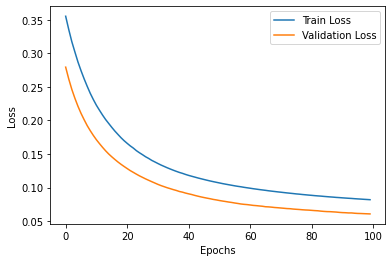

In [11]:
# Plot train and validation loss curves
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

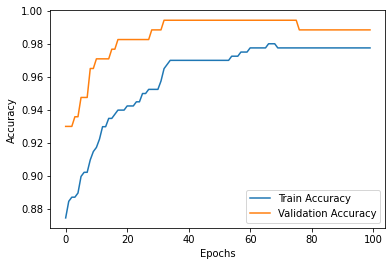

In [12]:
# Plot train and validation accuracy
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Make predictions
P = model.predict(X_test)

# Round to get actual predictions
P = np.round(P).flatten()

print(P)

[1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1.]


In [14]:
# Calculate accuracy
print("Accuracy {}%".format(np.round(np.mean(P == y_test)*100, 2)))
print("Evaluate output:", model.evaluate(X_test, y_test))

Accuracy 98.83%
6/6 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9883
Evaluate output: [0.06085318699479103, 0.988304078578949]


### Saving and loading the model

In [15]:
# Save model to a file
model.save('linearclassifier.h5')

# Check if model exists in directory
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K May 11 00:02 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K May  4 16:26 sample_data


In [16]:
# Load model from file
model = load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0609 - accuracy: 0.9883


[0.06085318699479103, 0.988304078578949]

In [0]:
# Download model file from colab
files.download('linearclassifier.h5')